# Robustness Tests on Blow-up and Non-smooth Functions

This section benchmarks the finite difference and adaptive derivative estimation methods on a set of **pathological or non-smooth functions**. These functions are designed to challenge the stability and robustness of derivative estimators.

---

### Functions Tested

We use a curated set of blow-up or discontinuous functions:

- $f(x) = \dfrac{1}{x}$  — singular at $x = 0$
- $f(x) = \log(x)$  — undefined for $x \leq 0$
- $f(x) = |x|$  — non-differentiable at $x = 0$
- $f(x) = \mathrm{sign}(x)$  — discontinuous at $x = 0$
- $f(x) = \sqrt{|x|}$  — infinite slope at $x = 0$

These represent edge cases where smooth polynomial approximations struggle, and are commonly used to assess the limits of numerical methods.

---

### Configuration

- **Evaluation point:** $x_0 = 0.04$ (away from singularities but still in challenging regimes)
- **Noise model:** Gaussian noise with standard deviation $\sigma = 0.02$
- **Derivative order:** First-order ($f'(x)$)
- **Trials:** 100 Monte Carlo trials
- **Fit tolerance:** 0.05
- **Plot directory:** `plots/blowup_fn`

---

### Plots Generated

For each blow-up function, the following diagnostics are generated:

1. **Overlaid Histograms**
   - Visualizes the spread of derivative estimates under noise.

2. **MSE vs. Noise Level**
   - Tracks mean squared error across increasing noise levels.

3. **Empirical CDF of Squared Errors**
   - Shows the full distribution of squared errors to highlight tail behavior.

4. **Paired Error Differences**
   - Compares squared errors between methods for each trial.

5. **Multi-Order Error vs. SNR Sweep**
   - Explores how MSE scales with signal-to-noise ratio for derivative orders 1–3, evaluated at $x = 0.5$ to avoid hard singularities.

---

This suite of plots helps reveal how each method degrades or adapts when faced with sharp features, discontinuities, or singularities. Comparing these results with the smooth-function benchmarks gives a full picture of method performance across regimes.


In [1]:
import warnings

import numpy as np

from derivkit.plotutils.plot_kit import PlotKit
from derivkit.plotutils.plot_kit import plot_multi_order_error_vs_noise
from notebooks.functions_dict import blowup_functions, get_ordinal, fit_tolerance

In [2]:
# Suppressing warnings to keep notebook output clean for version control (e.g., Git).
# Comment out the line below if you want to see the warnings for debugging.
warnings.filterwarnings('ignore')

In [3]:
# Configuration parameters for the derivative analysis ---
deriv_order = 1  # We are computing the 1st-order derivative (i.e., f'(x))
x0 = 0.04  # Evaluation point for all functions (slightly offset from 0 to avoid singularities)
noise_std = 0.02  # Standard deviation of the additive Gaussian noise
trials = 100  # Number of Monte Carlo trials per function
tol = fit_tolerance[f"{deriv_order}"]  # Tolerance level for adaptive fitting (e.g., residual threshold)
plot_dir = "plots/blowup_fn"  # Directory where plots will be saved

# Initialize a dictionary to store PlotKit instances for each blow-up function ---
plotters = {}

# Loop over each blow-up function and create a dedicated PlotKit instance
for name, func in blowup_functions.items():
    print(f"Processing: {name}")

    # Create a PlotKit object for this function with specified derivative settings
    plotter = PlotKit(
        function=func["func"],  # The function to differentiate
        central_value=x0,  # Evaluation point
        derivative_order=deriv_order,  # Derivative order (first derivative here)
        fit_tolerance=tol,  # Tolerance for the adaptive fitting method
        plot_dir=plot_dir  # Output directory for plots
    )

    # Store the PlotKit instance in the dictionary for later use
    plotters[name] = plotter


Processing: 1_over_x
Processing: log_x
Processing: abs_x
Processing: step
Processing: root_abs


## Plots

### Overlaid Histograms

Processing: 1_over_x


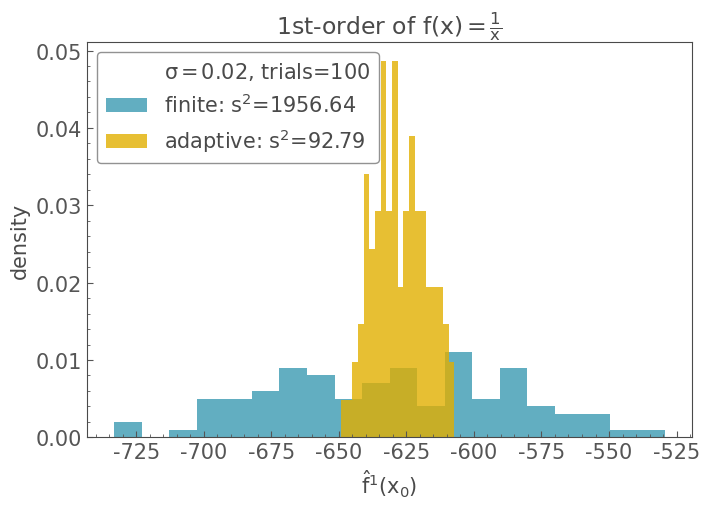

Processing: log_x


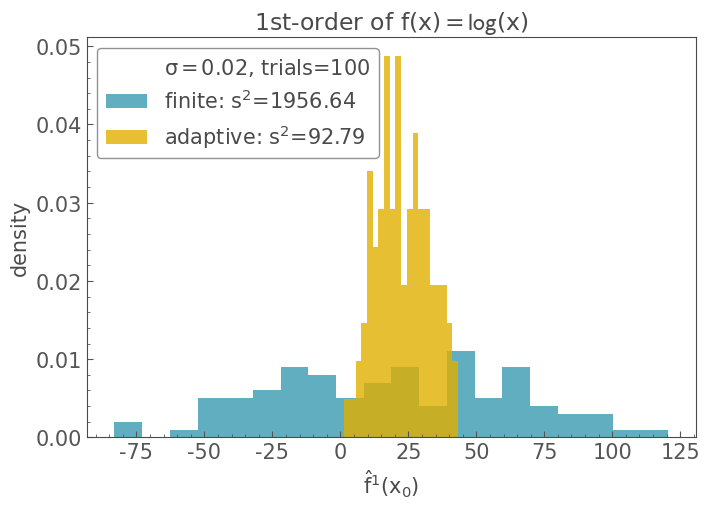

Processing: abs_x


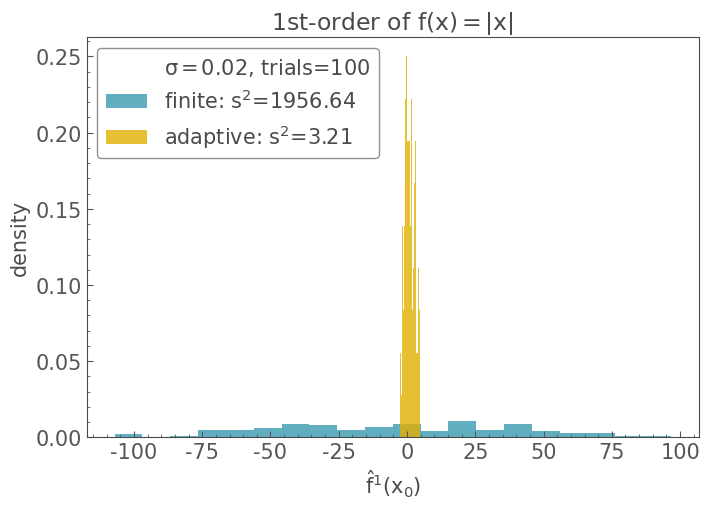

Processing: step


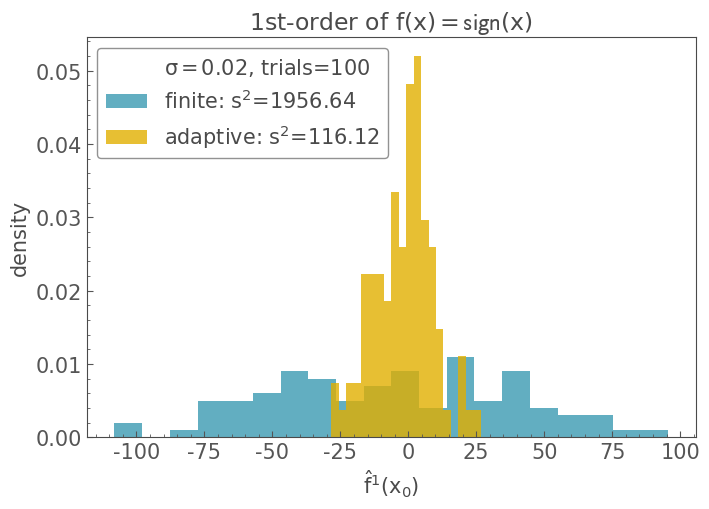

Processing: root_abs


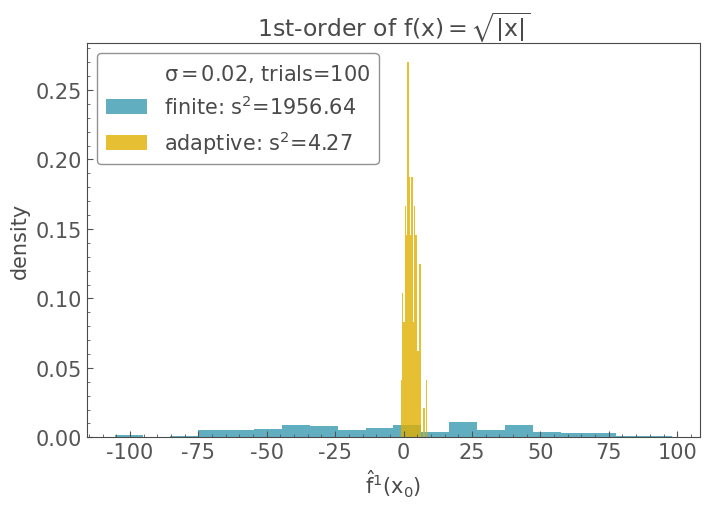

In [4]:
for name, func in blowup_functions.items():
    print(f"Processing: {name}")
    title = rf"{get_ordinal(deriv_order)}-order of {func['label']}"
    plotter = plotters[name]
    plotter.plot_overlaid_histograms(derivative_order=deriv_order,
                                     noise_std=noise_std,
                                     title=title,
                                     extra_info=name)

### MSE vs Noise Level

Processing: 1_over_x


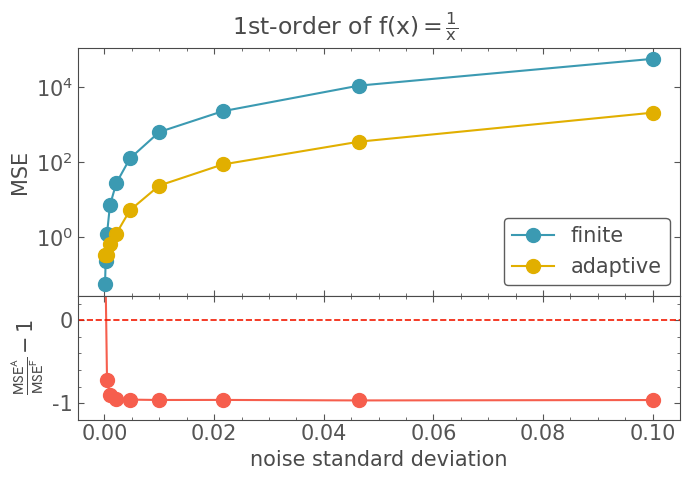

Processing: log_x


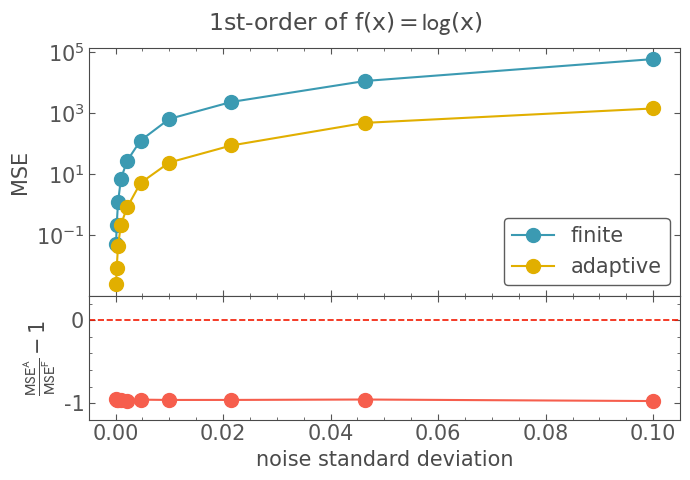

Processing: abs_x


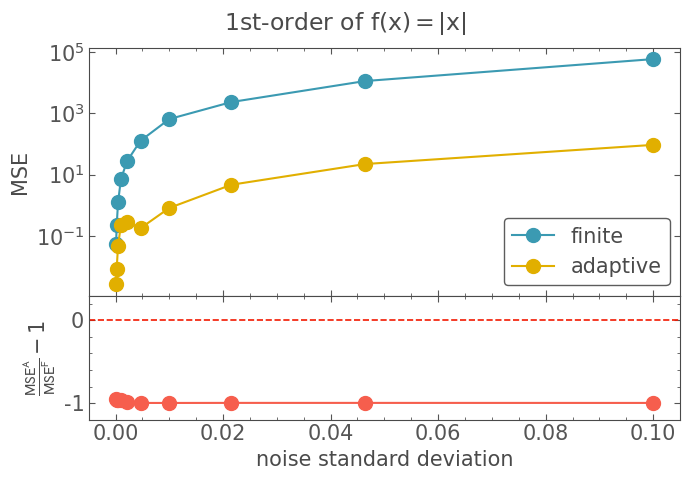

Processing: step


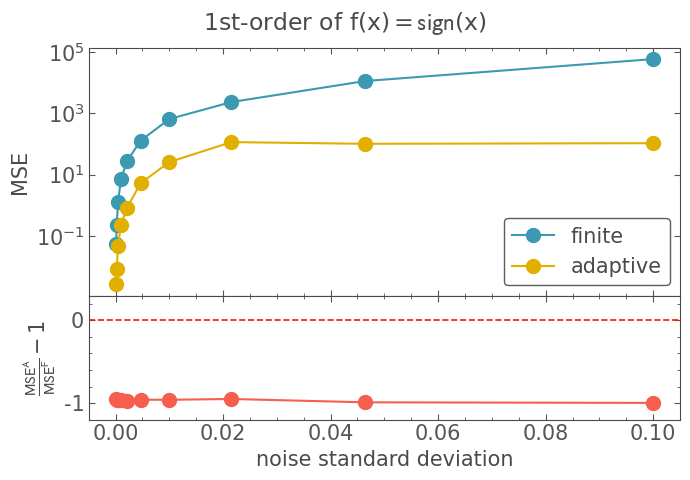

Processing: root_abs


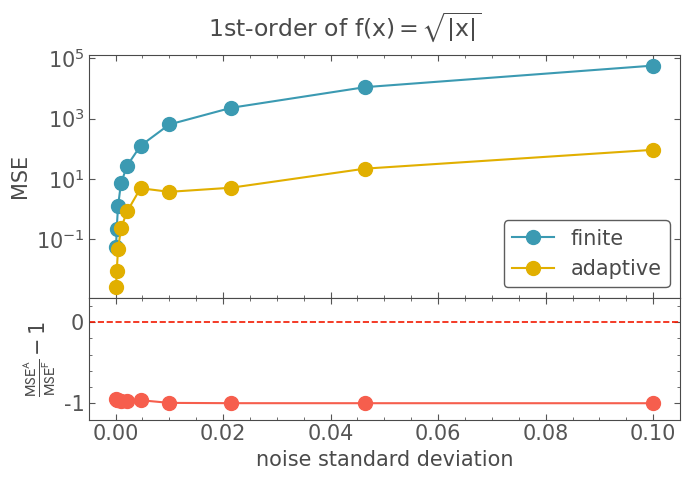

In [5]:
for name, func in blowup_functions.items():
    print(f"Processing: {name}")
    title = rf"{get_ordinal(deriv_order)}-order of {func['label']}"
    noise_levels = np.geomspace(1e-4, 1e-1, 10)  # from low to high noise
    plotter = plotters[name]
    plotter.plot_error_vs_noise(derivative_order=deriv_order,
                                noise_levels=noise_levels,
                                trials=trials,
                                title=title,
                                extra_info=name)


### Empirical CDF of Squared Errors

Processing: 1_over_x


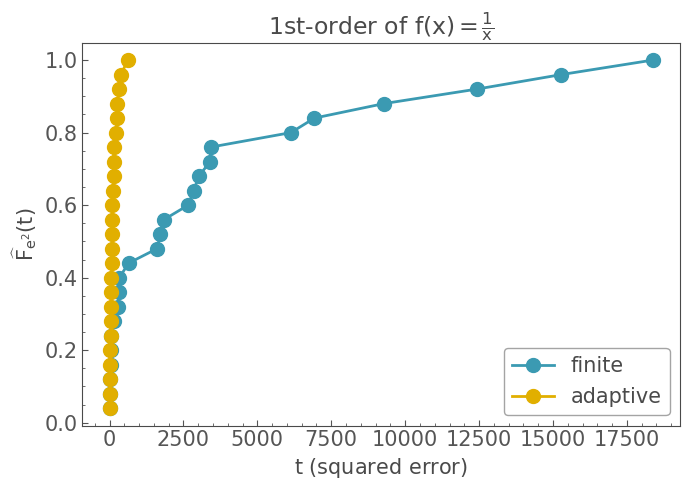

Processing: log_x


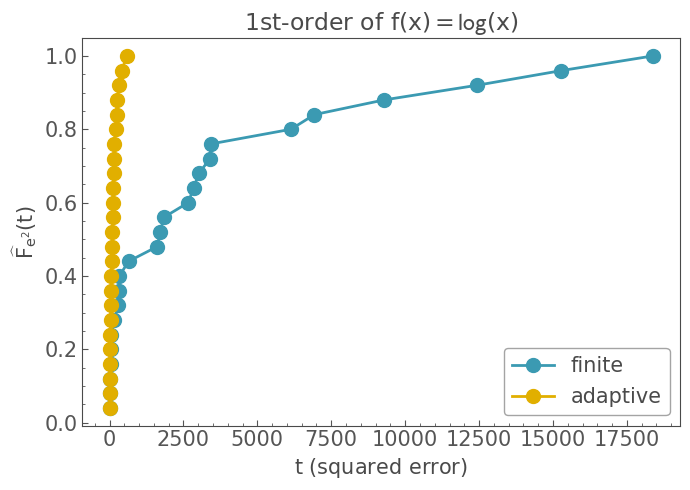

Processing: abs_x


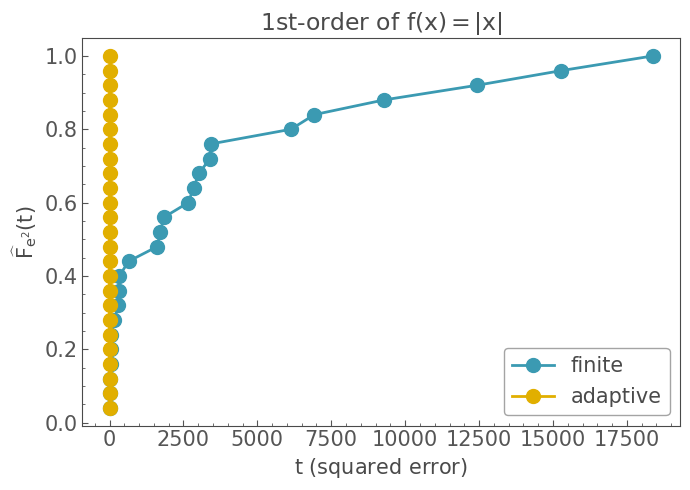

Processing: step


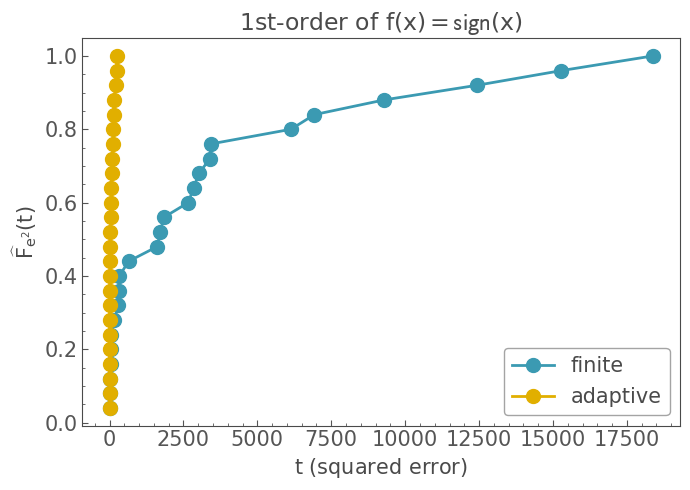

Processing: root_abs


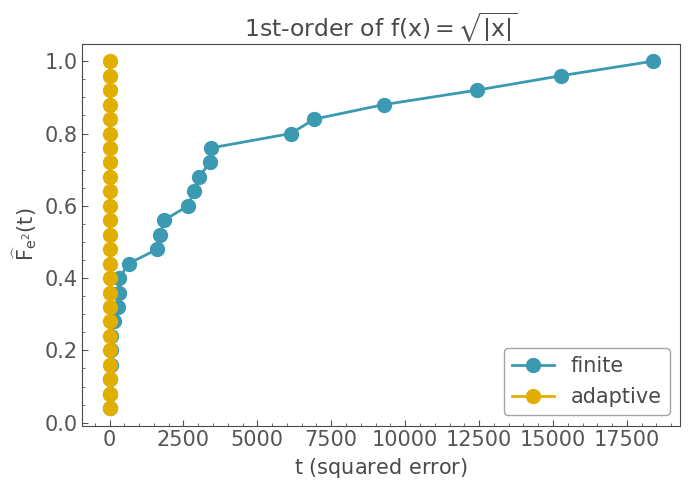

In [6]:
for name, func in blowup_functions.items():
    print(f"Processing: {name}")
    title = rf"{get_ordinal(deriv_order)}-order of {func['label']}"
    plotter = plotters[name]
    plotter.plot_ecdf_errors(noise_std=noise_std, trials=25, title=title, extra_info=name)

### Paired Error Differences

Processing: 1_over_x


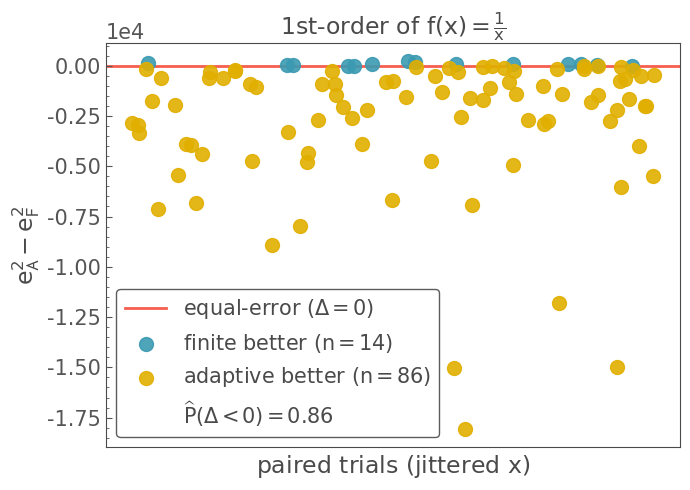

Processing: log_x


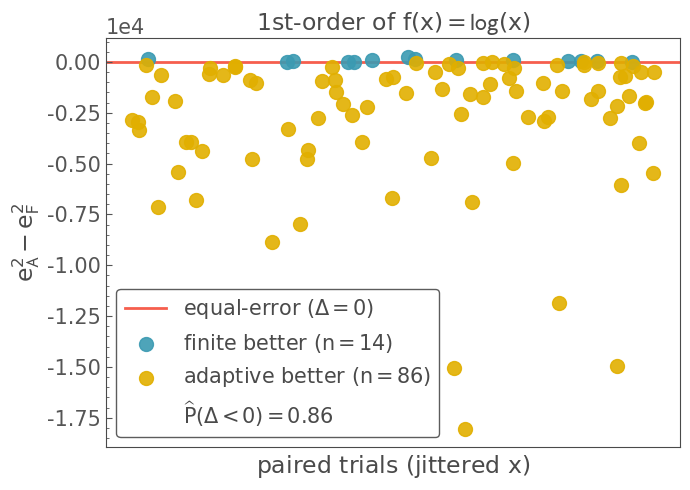

Processing: abs_x


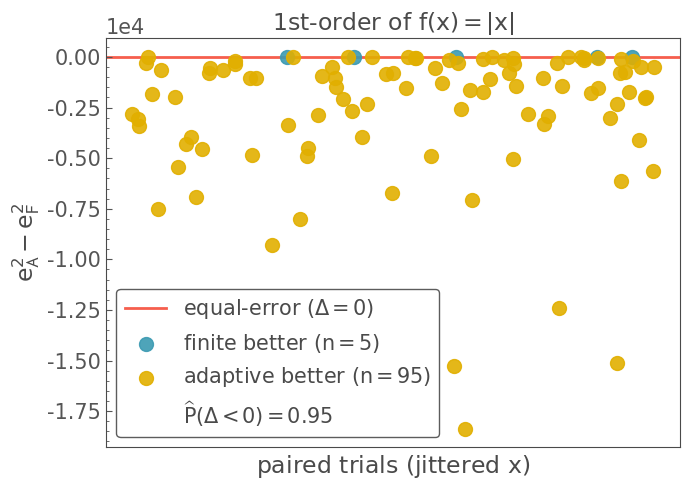

Processing: step


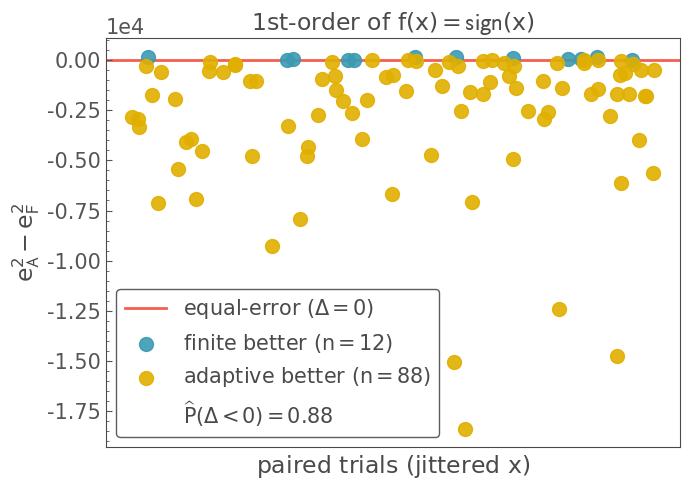

Processing: root_abs


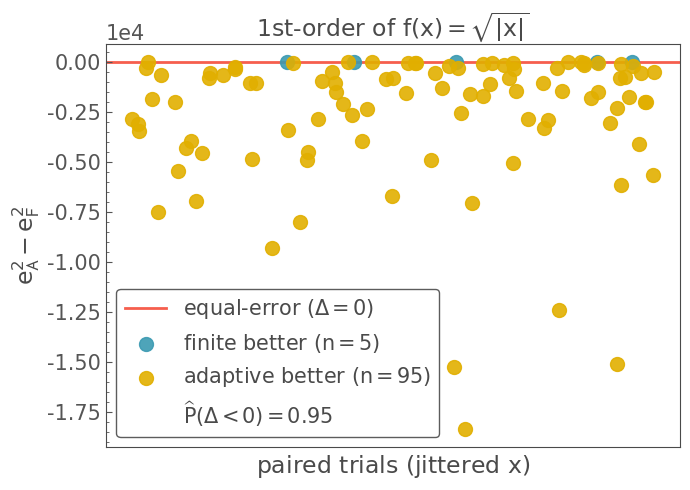

In [7]:
for name, func in blowup_functions.items():
    print(f"Processing: {name}")
    title = rf"{get_ordinal(deriv_order)}-order of {func['label']}"
    plotter = plotters[name]
    plotter.plot_paired_error_differences(noise_std=noise_std, trials=trials, title=title, extra_info=name)


### Multi-Order Error vs SNR Sweep

This plot explores how the mean squared error (MSE) of derivative estimates scales with signal-to-noise ratio (SNR) for different polynomial orders. It evaluates the robustness of the adaptive fitting method across a range of noise levels, specifically at $x = 0.5$ to avoid singularities.

Processing: 1_over_x
fuction: <lambda>, x_center: 0.5, title: 1st-order of $f(x) = \frac{1}{x}$


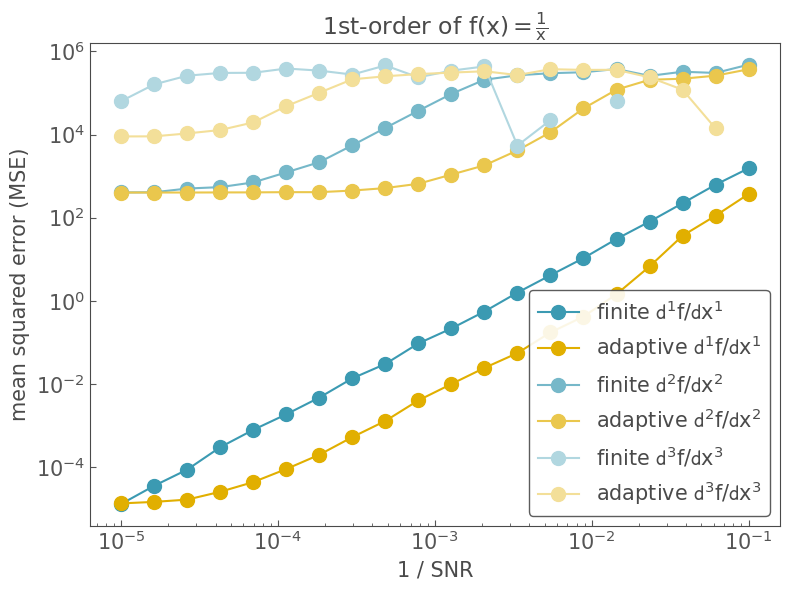

Processing: log_x
fuction: <lambda>, x_center: 0.5, title: 1st-order of $f(x) = \log(x)$


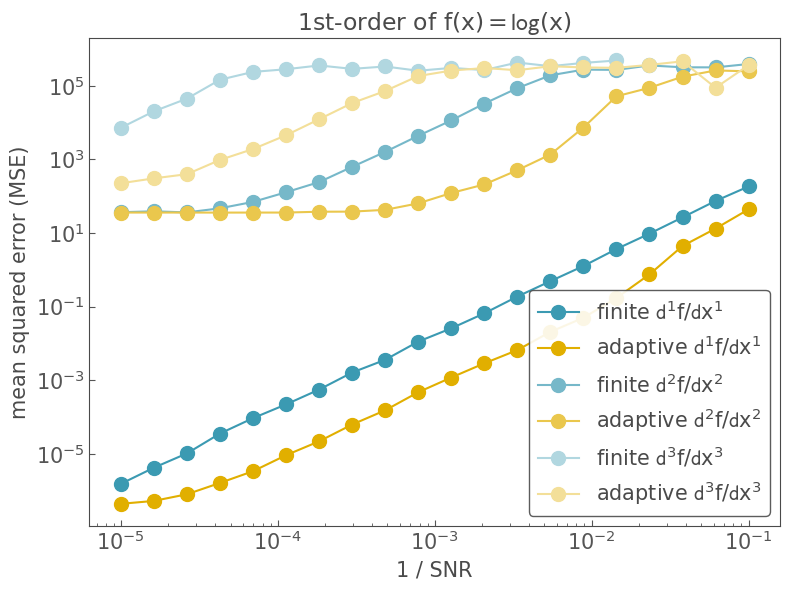

Processing: abs_x
fuction: <lambda>, x_center: 0.5, title: 1st-order of $f(x) = |x|$


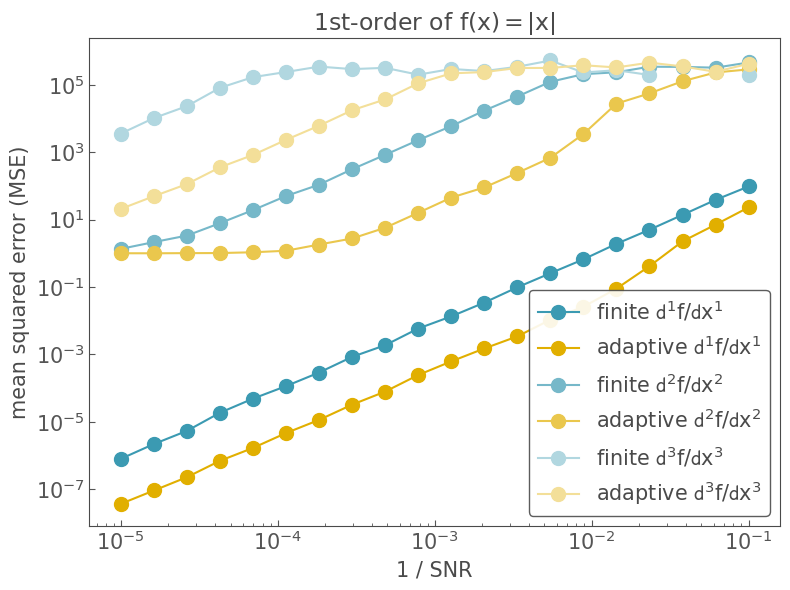

Processing: step
fuction: <lambda>, x_center: 0.5, title: 1st-order of $f(x) = \mathrm{sign}(x)$


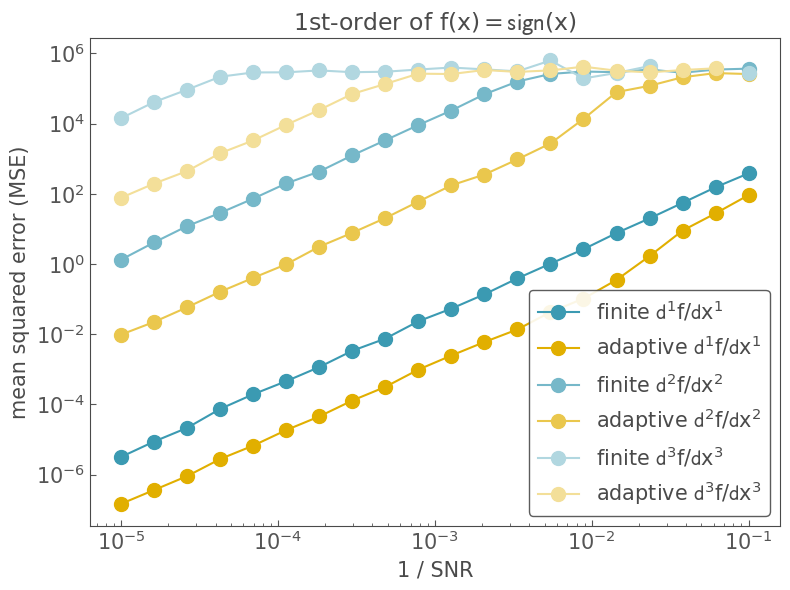

Processing: root_abs
fuction: <lambda>, x_center: 0.5, title: 1st-order of $f(x) = \sqrt{|x|}$


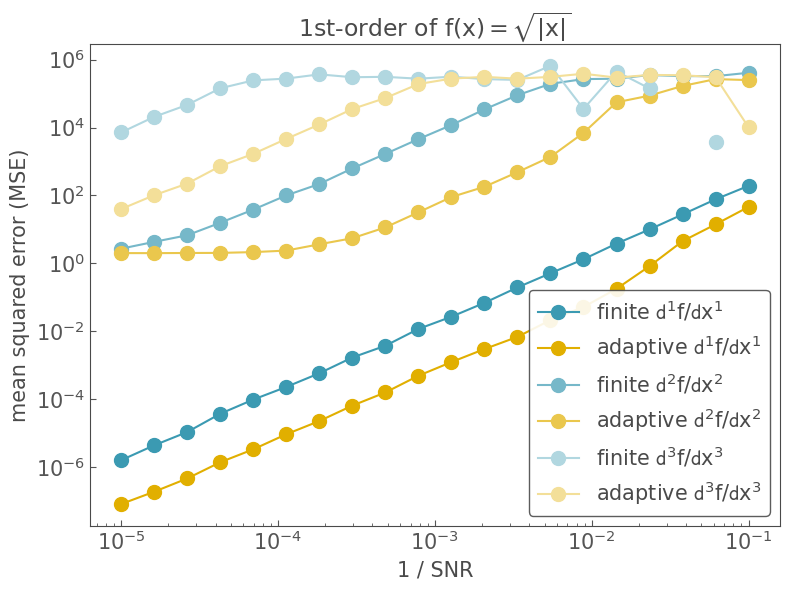

In [8]:
for name, func in blowup_functions.items():
    snr_values = np.logspace(1, 5, 20)
    print(f"Processing: {name}")
    title = rf"{get_ordinal(deriv_order)}-order of {func['label']}"
    print(f"fuction: {func['func'].__name__}, x_center: {0.5}, title: {title}")
    plot_multi_order_error_vs_noise(
    function=func["func"],
    central_value=0.5,
    snr_values=snr_values,
    orders=(1, 2, 3),
    trials=300,
    fit_tolerance=0.07,
    title=title,
    extra_info=name,
    plot_dir=plot_dir
)
